In [77]:
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch
from torchvision.utils import make_grid
from PIL import Image
import os

In [39]:
def slize_image(grid, num_row, num_col, vessel=2, img_size=256, index=None):
    """Receives an image from torchvision.utils.make_grid as numpy array,
    num images per row and num images per col,
    and return a list of lists with the images in each entry.
    Is index is not None, return the images from the index. (list)
    """
    images = []
    images_row = []
    for row in range(num_row):
        images_row.append(grid[(row + 1)*vessel + row*img_size: (row + 1)*vessel + (row + 1)*img_size, :, :])
    
    
    for image_row in images_row:
        images_col = []
        for col in range(num_col):
            images_col.append(image_row[:, (col + 1)*vessel + col*img_size: (col + 1)*vessel + (col + 1)*img_size, :])
        
        images.append(images_col)
        
    if index is not None:
        i, j = index[0], index[1]
        return images[i, j] 
    else:
        return images
    
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

### aaan2_images

In [78]:
aaan2 = ['aaan2_step1.png', 'aaan2_step3.png', 'aaan2_step5.png', 'aaan2_step10.png', 'aaan2_step15.png']

step1 = np.array(Image.open('images/inputs/' + aaan2[0]))
step3 = np.array(Image.open('images/inputs/' + aaan2[1]))
step5 = np.array(Image.open('images/inputs/' + aaan2[2]))
step10 = np.array(Image.open('images/inputs/' + aaan2[3]))
step15 = np.array(Image.open('images/inputs/' + aaan2[4]))

all_grids = [step1, step3, step5, step10, step15]

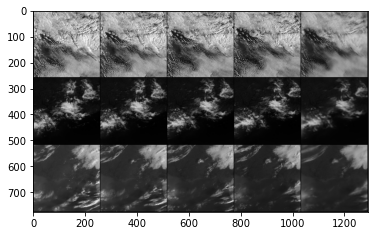

In [3]:
plt.figure()
plt.imshow(torch.from_numpy(step1)) #[:4, :4])
plt.show()

In [79]:
# slizing the image:
size = 256
print(f'Image: {step1.shape}, Hsinvessels: {size*3}, Wsinvessels: {size*5}')
print(f'Tot H vessels: {step1.shape[0] - size*3}. Tot W vessels: {step1.shape[1] - size*5}')

Image: (776, 1292, 3), Hsinvessels: 768, Wsinvessels: 1280
Tot H vessels: 8. Tot W vessels: 12


In [80]:
images = slize_image(step1, num_row=3, num_col=5)

In [81]:
# This figure is aaan9_images in the doc
# the idea is to put the input sequence and gt on one row, and the images that change with training on the other row
plt.rcParams["figure.figsize"] = (20, 10)
import torchvision.transforms.functional as F

# zeros = torch.zeros_like(gt)

# in_seq image:
in_seq = [torch.from_numpy(image).permute(2, 0, 1) for image in images[0][:-2]]
grid_in_seq = make_grid(in_seq, nrow=3).permute(1, 2, 0).numpy()
im = Image.fromarray(grid_in_seq)
im.save("images/outputs/aaan2_iamges_in_seq.png")


# gt:
# workaround aca
gt = torch.from_numpy(images[0][-2]).permute(2, 0, 1)
grid_gt = make_grid([gt, gt], nrow=2)[:, :, 258:].permute(1, 2, 0).numpy()
im = Image.fromarray(grid_gt)
im.save("images/outputs/aaan2_iamges_gt.png")

# row:
row = [torch.from_numpy(slize_image(step, num_row=3, num_col=5)[0][-1]).permute(2, 0, 1) for step in all_grids]
grid_row = make_grid(row, nrow=5).permute(1, 2, 0).numpy()
im = Image.fromarray(grid_row)
im.save("images/outputs/aaan2_iamges_row.png")



# show(grid_gt)

<class 'numpy.ndarray'> (260, 260, 3) uint8


### baab6_images

In [90]:
# los pt son de 4x5, voy a tomar las ultimas 3 filas, en ep0, y ahora veo cuales mas
path = os.path.join('images', 'inputs', 'baab6')


# unet output
grid = torch.load(os.path.join(path, 'baab6_epoch0.pt') , map_location='cpu').permute(1, 2, 0).numpy()

images = slize_image(grid, num_row=4, num_col=5)

images = [
    torch.from_numpy(images[1][-1]).permute(2, 0, 1), 
    torch.from_numpy(images[2][-1]).permute(2, 0, 1), 
    torch.from_numpy(images[3][-1]).permute(2, 0, 1)
]

grid = np.multiply(make_grid(images, nrow=1).permute(1, 2, 0).numpy(), 255).astype(np.uint8)

im = Image.fromarray(grid)
im.save("images/outputs/baab6_images_unet_output.png")

# gan output
indexes = [1, 2, 3, 5, 10, 40]
examples = [1, 2, 3]
im_list = []
for im_example in examples:
    for idx in indexes:
        grid = torch.load(os.path.join(path, f'baab6_epoch{idx}.pt') , map_location='cpu').permute(1, 2, 0).numpy()

        images = slize_image(grid, num_row=4, num_col=5)

        im_list += torch.from_numpy(images[im_example][-1]).permute(2, 0, 1), 

grid = np.multiply(make_grid(im_list, nrow=len(indexes)).permute(1, 2, 0).numpy(), 255).astype(np.uint8)
im = Image.fromarray(grid)
im.save("images/outputs/baab6_iamges_gan_output_eps1-2-3-5-10-40.png")
# show(grid)

array([1.25892541e+00, 4.53042380e+01, 1.63033803e+03, 5.86700543e+04,
       2.11132612e+06])